# Analyse de la structure électronique du KLaTe2

## Introduction
### Ce notebook analyse la structure de bande électronique d'un matériau donné. Il détermine la bande interdite, la dispersion des bandes de valence et conduction, et calcule la masse effective des électrons et trous.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter, DosPlotter

In [4]:
# Chargement des données
API_KEY = "71t7m37H7F5Jw2PfGOrlKxgH4ZbRQh3W" 
MP_ID = "mp-11739" 

In [5]:
with MPRester(API_KEY) as m:
    el_bs = m.get_bandstructure_by_material_id(MP_ID)
    el_dos = m.get_dos_by_material_id(MP_ID)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Détermination de la bande interdite

L'énergie de la bande interdite d'un matériau est un paramètre clé qui permet de distinguer différents types de matériaux :

- **Métaux** : bande interdite quasi nulle (~ 0 eV).
- **Semi-conducteurs** : bande interdite typiquement entre 0 et 3 eV.
- **Isolants** : bande interdite généralement supérieure à 3 eV.

L’écart énergétique entre le sommet de la bande de valence (VBM) et le bas de la bande de conduction (CBM) peut être de deux types :

1. **Bande interdite directe** : le CBM et le VBM sont situés au même vecteur d’onde (k), permettant une transition électronique sans changement de moment.
2. **Bande interdite indirecte** : le CBM et le VBM sont à des positions k différentes, ce qui nécessite un transfert de moment, souvent par interaction avec un phonon.

Dans ce notebook, nous utiliserons la fonction `get_band_gap()` pour calculer cette bande interdite et déterminer si elle est directe ou indirecte.

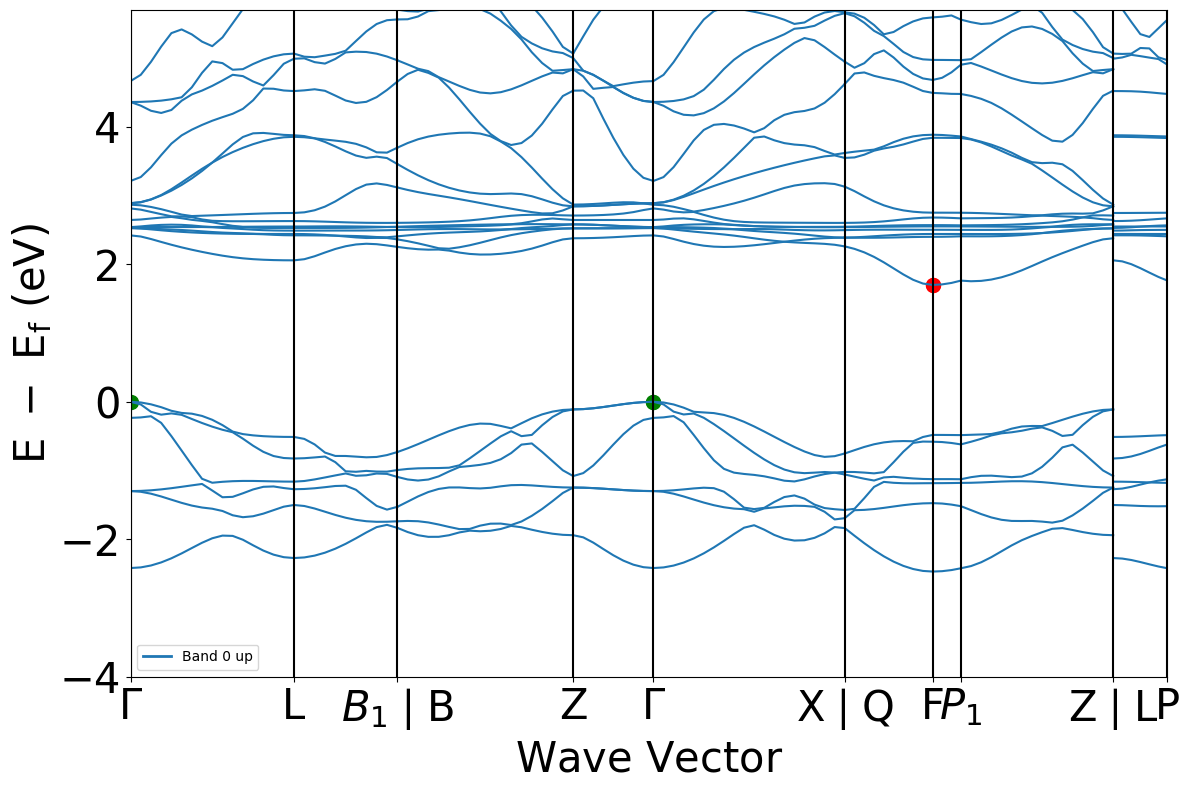

In [13]:
# Affichage des bandes électroniques
fig_el_bs = BSPlotter(el_bs)
fig_el_bs.get_plot(vbm_cbm_marker=True)
plt.show()

In [12]:
# Détermination de la bande interdite
vbm_info = el_bs.get_vbm()
cbm_info = el_bs.get_cbm()

# Calcul de l'écart énergétique entre le bas de la bande de conduction (CBM) et le sommet de la bande de valence (VBM)
gap = cbm_info["energy"] - vbm_info["energy"] 
print(f"Bande interdite (gap) : {gap} eV")

# Vérification
band_gap = el_bs.get_band_gap()
print(f"Vérification - Bande interdite : {band_gap['energy']} eV")

Bande interdite (gap) : 1.7012999999999994 eV
Vérification - Bande interdite : 1.7012999999999994 eV


## Analyse de la dispersion

L'analyse de la dispersion consiste à étudier la variation de l'énergie des bandes électroniques en fonction de la direction dans l'espace des moments. La dispersion est liée à la pente de la courbe \( \frac{dE}{dk} \), où \( E \) est l'énergie et \( k \) est le vecteur d'onde. Une grande pente indique une forte dispersion, c'est-à-dire une variation rapide de l'énergie, tandis qu'une faible pente montre une faible dispersion. Une forte dispersion est généralement associée à une meilleure mobilité des électrons, car les électrons peuvent se déplacer plus facilement dans ces directions. 

Pour identifier les directions de forte et faible dispersion, on observe les variations de \( \frac{dE}{dk} \) dans les courbes de la bande de valence et de conduction, et on peut les illustrer par des flèches sur une figure.
